In [13]:
import torch
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
import matplotlib as mpl
import os
import gc
import pandas as pd
import csv
from numpy import *
from torch.utils.tensorboard import SummaryWriter
from datetime import date
import random
from generate_property import output_property

1) A, B,C, D, E are the five qualitative variable which occur in a primary sequence. 0-A, 1-B, 2-C, 3-D, 4-E
2) A: (x%4), B=(x%6)**2, C = (x%5)**2.5, D = (x%8)**0.8, E = (x%3)**1.3

In [14]:
## different amino acids
amino_acid = ['A','B','C','D','E','X'] # X is the uncommon amino acid, so total length is 6
np.save('../model/categorical_variables', amino_acid)
print('Number of unique amino acids are', np.shape(np.unique(amino_acid))[0])

def onehotseq(sequence):
  seq_len = len(sequence)
  seq_en = np.zeros(( seq_len, np.shape(amino_acid)[0]))
  for i in range(seq_len):
      seq_en[i,sequence[i]] = 1
  return seq_en

Number of unique amino acids are 6


**All Dataset**

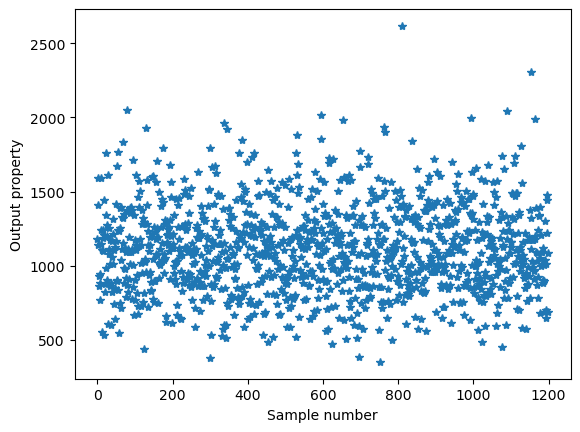

In [15]:
N=1200
L=50
m_l = 1
motif_length = 3
creating_example = np.zeros((N,L), dtype=int) #np.random.randint(0,5, (N,L), dtype=int)
seq_length = np.ones((N,), dtype=int)*L

## creating the primary sequence
for i in range(N):
    j = 0
    while j <= (L-m_l):
        choose_aa = random.choices([0,1,2,3,4,5], \
            weights=[0.18,0.18,0.18,0.18,0.18,0.1], k=1)[0]  
        creating_example[i,j:j+m_l] = int(choose_aa)
        j += 1


output_y, _ = output_property(creating_example)

ohe = np.zeros((creating_example.shape[0], creating_example.shape[1], len(amino_acid)))
for i in range(ohe.shape[0]): 
    l = seq_length[i]
    ohe[i,0:l,:] = onehotseq(creating_example[i,0:l])

plt.plot(output_y, '*')
plt.ylabel('Output property')
plt.xlabel('Sample number')
plt.show()

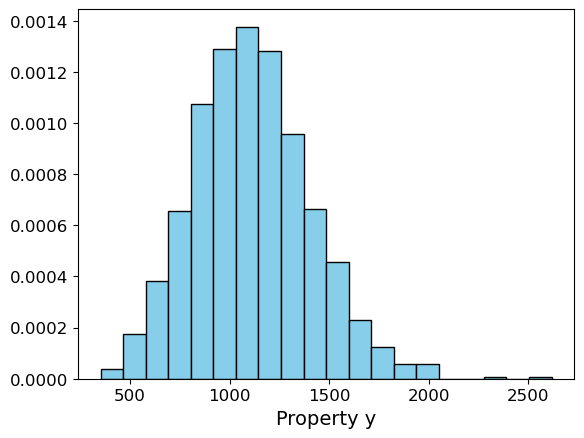

In [16]:
plt.hist(output_y, bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Property y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Divide Dataset**

In [17]:
all_ex = np.arange(ohe.shape[0])
X, x_test, _, _ = train_test_split( all_ex, all_ex, test_size=0.083333,random_state=10)
x_train, x_valid, _, _ = train_test_split( X, X, test_size=0.0909,random_state=10)

print('Train',x_train.shape)
print('Test' ,x_test.shape)
print('Valid',x_valid.shape)

print(ohe[x_train].shape, seq_length[x_train].shape, output_y[x_train].shape)

Train (1000,)
Test (100,)
Valid (100,)
(1000, 50, 6) (1000,) (1000,)


In [18]:
np.save('./x_train', ohe[x_train])
np.save('./len_train', seq_length[x_train])
np.save('./y_train', output_y[x_train])

np.save('./x_valid', ohe[x_valid])
np.save('./len_valid', seq_length[x_valid])
np.save('./y_valid', output_y[x_valid])

np.save('./x_test', ohe[x_test])
np.save('./len_test', seq_length[x_test])
np.save('./y_test', output_y[x_test])
